# TASK 1: PROJECT OVERVIEW
 Aim of the project is to detect the emotion and facial keypoints of the people from the face image.

# TASK 2: Import Library

In [1]:
#Import the necessary packages

import pandas as pd
import numpy as np
import os
import PIL
import seaborn as sns
import pickle
from PIL import *
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


# FACIAL KEY-POINT DETECTION:

# TASK 3: Important key feature points

In [2]:
# Upload the Datasets
df = pd.read_csv("C:/Users/visha/Emotion/data.csv")

In [3]:
df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [4]:
# These are the numerical feature for each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
left_eye_center_x            2140 non-null float64
left_eye_center_y            2140 non-null float64
right_eye_center_x           2140 non-null float64
right_eye_center_y           2140 non-null float64
left_eye_inner_corner_x      2140 non-null float64
left_eye_inner_corner_y      2140 non-null float64
left_eye_outer_corner_x      2140 non-null float64
left_eye_outer_corner_y      2140 non-null float64
right_eye_inner_corner_x     2140 non-null float64
right_eye_inner_corner_y     2140 non-null float64
right_eye_outer_corner_x     2140 non-null float64
right_eye_outer_corner_y     2140 non-null float64
left_eyebrow_inner_end_x     2140 non-null float64
left_eyebrow_inner_end_y     2140 non-null float64
left_eyebrow_outer_end_x     2140 non-null float64
left_eyebrow_outer_end_y     2140 non-null float64
right_eyebrow_inner_end_x    2140 non-null float64
right_eyebrow_inner_end_y 

In [5]:
df.shape

(2140, 31)

In [6]:
# Total number of feature are 31 
# Lets check the Null value
df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

# Task 4 Preprocessing

In [7]:
#Shape of the image
df['Image'][0]

'238 236 237 238 240 240 239 241 241 243 240 239 231 212 190 173 148 122 104 92 79 73 74 73 73 74 81 74 60 64 75 86 93 102 100 105 109 114 121 127 132 134 137 137 140 139 138 137 137 140 141 143 144 147 148 149 147 147 148 145 147 144 146 147 147 143 134 130 130 128 116 104 98 90 82 78 85 88 86 80 77 87 108 111 115 128 133 188 242 252 250 248 251 250 250 250 235 238 236 238 238 237 238 242 241 239 237 233 215 195 187 156 119 103 93 78 68 73 75 75 72 75 70 61 66 77 91 96 106 108 113 120 125 131 134 138 135 138 139 145 144 144 142 140 141 141 148 147 150 149 152 151 149 150 147 148 144 148 144 146 146 143 139 128 132 135 128 112 104 97 87 78 79 83 85 83 75 75 89 109 111 117 117 130 194 243 251 249 250 249 250 251 237 236 237 238 237 238 241 238 238 238 241 221 195 187 163 124 106 95 81 68 70 73 73 72 73 69 65 74 82 94 103 110 111 119 127 135 140 139 144 144 145 143 143 143 146 144 144 147 146 148 147 150 146 147 150 150 149 147 147 144 147 144 149 146 144 144 144 140 131 133 133 125 110 

In [8]:
# There is no null value
# These value are in 1 D array so they are looking in number let convert to 2D array
df['Image'] = df['Image'].apply(lambda x: np.fromstring(x , dtype=int , sep = ' ').reshape(96,96))

In [9]:
#Shape of the image
df['Image'][0].shape

(96, 96)

# Task 5 Visual the Image

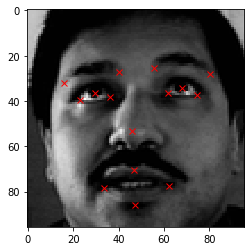

In [10]:
# Visualized the Image 
# This same thing we have seen in the Digit recorgination
i = np.random.randint(1,len(df))
plt.imshow(df['Image'][i],cmap='gray')
for j in range(1,31,2):
    plt.plot(df.loc[i][j-1],df.loc[i][j], 'rx')

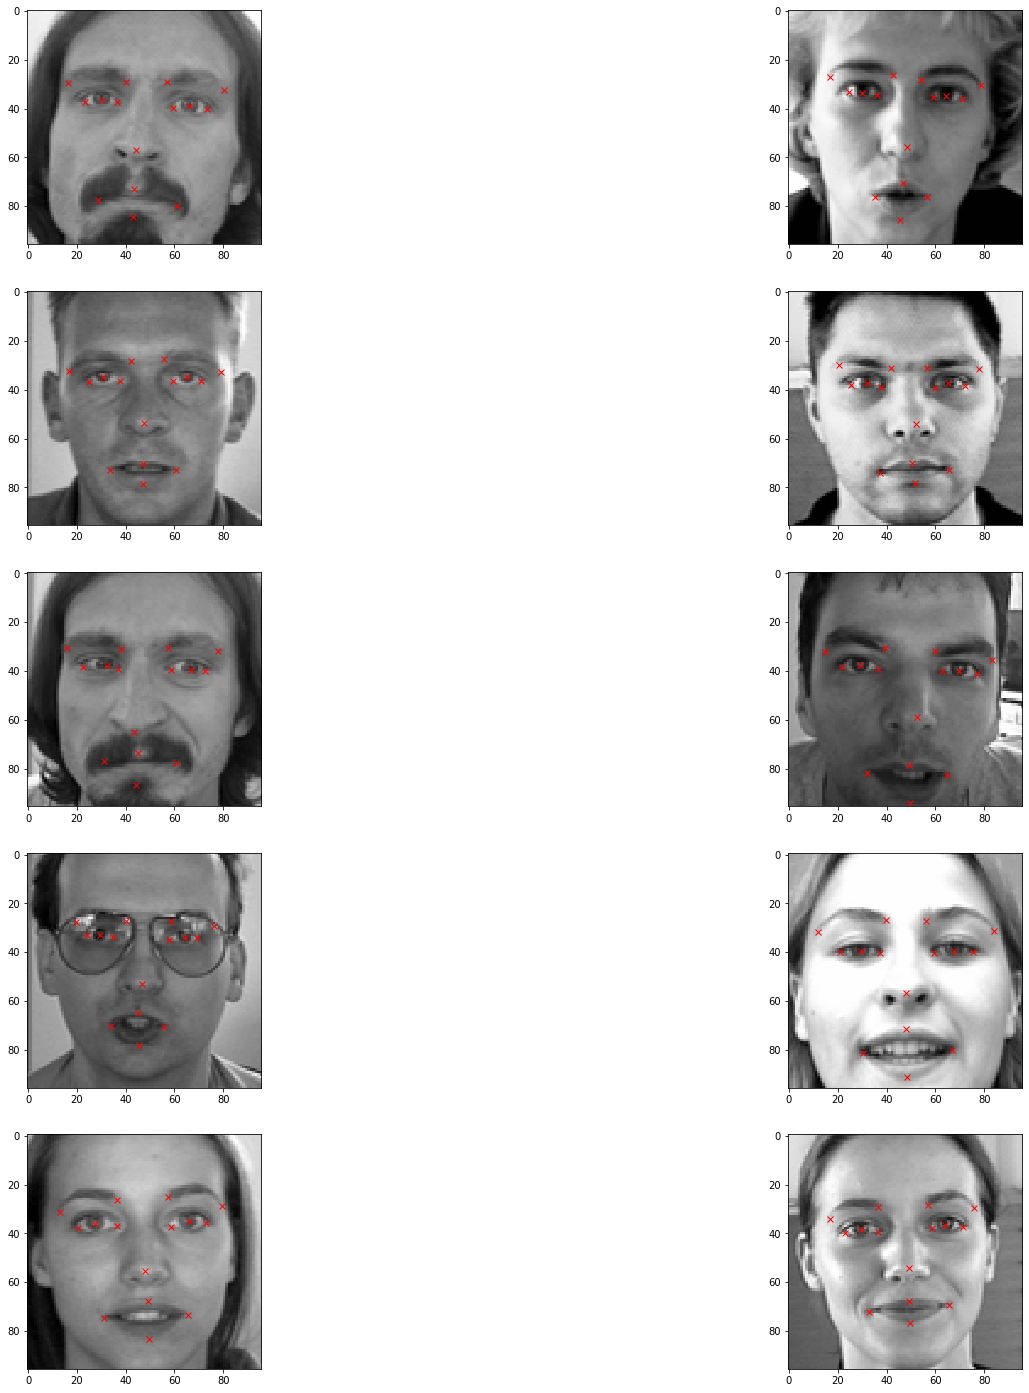

In [11]:
# Let's view more images in a grid format
fig = plt.figure(figsize=(25, 25)) # This is for the figure size

for i in range(10): # Loop will work for 10 times
    ax = fig.add_subplot(5 , 2, i + 1)    
    image = plt.imshow(df['Image'][i],cmap='gray')
    for j in range(1,31,2):
        plt.plot(df.loc[i][j-1], df.loc[i][j], 'rx')

In [12]:
# Data Augumentation
import copy
df_copy1 = copy.copy(df) # This will create a copy

In [13]:
# Display all the columns
col = df_copy1.columns[:-1]  # Left the last columns

In [14]:
col

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [15]:
# Function of the image to flip the image Horizonatally
# Horizontal Flip - flip the images along y axis
df_copy1['Image'] = df_copy1['Image'].apply(lambda x: np.flip(x, axis = 1))

#since we are flipping horizontally, y coordinate values would be the same
#Only x coordiante values would change, all we have to do is to subtract our initial x-coordinate values from width of the image(96)
for i in range(len(col)):
    if i%2 == 0:
        df_copy1[col[i]] = df_copy1[col[i]].apply(lambda x: 96. - float(x) )

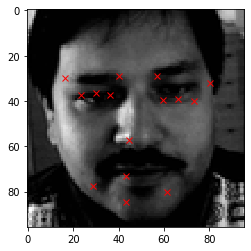

In [16]:
# First we will see the Original image
plt.imshow(df['Image'][200],cmap='gray')
for j in range(1,31,2): 
    plt.plot(df.loc[0][j-1],df.loc[0][j], 'rx')
    

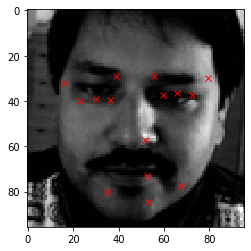

In [17]:
# We will flip the Image Horizontally
plt.imshow(df_copy1['Image'][200],cmap='gray')
for j in range(1,31,2):
        plt.plot(df_copy1.loc[0][j-1], df_copy1.loc[0][j], 'rx')

In [18]:
# Concatenate the Image augumented Image and the df
New_Data = np.concatenate((df,df_copy1))

In [19]:
# Increase the Brightness of the Image
import random 
df_copy1 = copy.copy(df)
df_copy1['Image'] = df['Image'].apply(lambda x:np.clip(random.uniform(1, 2)* x,0.0, 255.0))
New_Data = np.concatenate((New_Data,df_copy1))
New_Data.shape


(6420, 31)

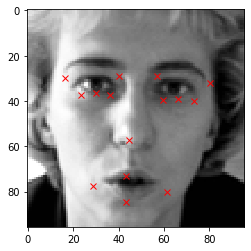

In [20]:
# Image with increased brightness

plt.imshow(df_copy1['Image'][1],cmap='gray')
for j in range(1,31,2):
        plt.plot(df_copy1.loc[0][j-1], df_copy1.loc[0][j], 'rx')

In [21]:
# Decreased the brightness directly
df_copy1 = copy.copy(df)
df_copy1['Image'] = df['Image'].apply(lambda x:np.clip(random.uniform(0, 1)* x,0.0, 255.0))
New_Data = np.concatenate((New_Data,df_copy1))
New_Data.shape

(8560, 31)

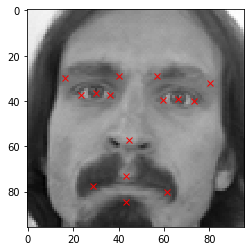

In [22]:
#Brightness decreased image

plt.imshow(df_copy1['Image'][0],cmap='gray')
for j in range(1,31,2):
        plt.plot(df_copy1.loc[0][j-1], df_copy1.loc[0][j], 'rx')

In [23]:
# Task 7 : Normalization
#Gettin the value of images, which is present in the 31st column (since index start from 0, we refer 31st column by 30)
img = New_Data[:,30]

#Normalizig the image
img = img/255.

#Creating an empty array of shape (8560,96,96,1) to feed the model
X = np.empty((len(img), 96, 96, 1))

#Iterating through the img list and adding image values to the empty array after expanding it's dimension from (96,96) to (96,96,1)
for i in range(len(img)):
  X[i,]= np.expand_dims(img[i], axis = 2)

#Converting the array type to float32
X = np.asarray(X).astype(np.float32)
X.shape

(8560, 96, 96, 1)

In [24]:
#Getting the value of coordinates, which are to used as target.
y = New_Data[:,:30]
y = np.asarray(y).astype(np.float32)
y.shape

(8560, 30)

In [25]:
#Splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1)

# TASK 8: BUILD DEEP RESIDUAL NEURAL NETWORK MODEL

In [26]:
def res_block(X, filter, stage):
  #Convolutional_block

  X_copy = X

  f1 , f2, f3 = filter
  #Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  #Short path

  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  #ADD

  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  #Identity Block 1

  X_copy = X


  #Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  #ADD

  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  #Identity Block 2

  X_copy = X


  #Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  #ADD

  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [27]:
input_shape = (96,96,1)

#Input tensor shape
X_input = Input(input_shape)

#Zero-padding

X = ZeroPadding2D((3,3))(X_input)

# 1 - stage

X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2- stage

X = res_block(X, filter= [64,64,256], stage= 2)

# 3- stage

X = res_block(X, filter= [128,128,512], stage= 3)



#Average Pooling

X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

#Final layer

X = Flatten()(X)
X = Dense(4096, activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation = 'relu')(X)
X = Dropout(0.1)(X)
X = Dense(30, activation = 'relu')(X)


model = Model( inputs= X_input, outputs = X)
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 102, 102, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0

# TASK 9: COMPILE AND TRAIN DEEP LEARNING MODEL

In [28]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="mean_squared_error",optimizer= adam , metrics = ['accuracy'])

In [29]:
#save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath="weights_keypoint.hdf5", verbose=1, save_best_only=True)

In [30]:
history = model.fit(X_train, y_train, batch_size = 32, epochs= 50 , validation_split = 0.05, callbacks=[checkpointer])

Train on 7318 samples, validate on 386 samples
Epoch 1/50
7296/7318 [============================>.] - ETA: 0s - loss: 351.2669 - acc: 0.5670
Epoch 00001: val_loss improved from inf to 500.36547, saving model to weights_keypoint.hdf5
7318/7318 [==============================] - 223s 31ms/sample - loss: 350.9454 - acc: 0.5670 - val_loss: 500.3655 - val_acc: 0.7098
Epoch 2/50
7296/7318 [============================>.] - ETA: 2:28 - loss: 229.7898 - acc: 0.6323
Epoch 00002: val_loss improved from 500.36547 to 277.49583, saving model to weights_keypoint.hdf5
7318/7318 [==============================] - 49294s 7s/sample - loss: 229.8062 - acc: 0.6324 - val_loss: 277.4958 - val_acc: 0.7098
Epoch 3/50
7296/7318 [============================>.] - ETA: 0s - loss: 209.9147 - acc: 0.6360
Epoch 00003: val_loss improved from 277.49583 to 108.79652, saving model to weights_keypoint.hdf5
7318/7318 [==============================] - 222s 30ms/sample - loss: 209.5333 - acc: 0.6361 - val_loss: 108.7965 

Epoch 29/50
7296/7318 [============================>.] - ETA: 0s - loss: 10.8346 - acc: 0.6933
Epoch 00029: val_loss did not improve from 48.10603
7318/7318 [==============================] - 214s 29ms/sample - loss: 10.8359 - acc: 0.6935 - val_loss: 61.2840 - val_acc: 0.7098
Epoch 30/50
7296/7318 [============================>.] - ETA: 0s - loss: 10.1740 - acc: 0.7015
Epoch 00030: val_loss did not improve from 48.10603
7318/7318 [==============================] - 213s 29ms/sample - loss: 10.1632 - acc: 0.7021 - val_loss: 52.6971 - val_acc: 0.7228
Epoch 31/50
7296/7318 [============================>.] - ETA: 0s - loss: 9.1616 - acc: 0.7103
Epoch 00031: val_loss did not improve from 48.10603
7318/7318 [==============================] - 214s 29ms/sample - loss: 9.1568 - acc: 0.7103 - val_loss: 54.8953 - val_acc: 0.6451
Epoch 32/50
7296/7318 [============================>.] - ETA: 0s - loss: 10.8926 - acc: 0.7042
Epoch 00032: val_loss did not improve from 48.10603
7318/7318 [=============

In [31]:
#saving the model architecture to json file for future use

model_json = model.to_json()
with open("C:/Users/visha/Emotion/detection.json","w") as json_file:
    json_file.write(model_json)


In [32]:
with open('C:/Users/visha/Emotion/detection.json', 'r') as json_file:
    json_savedModel= json_file.read()
#load the model architecture 
model = tf.keras.models.model_from_json(json_savedModel)
model.load_weights('C:/Users/visha/Emotion/weights_keypoint.hdf5')
adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="mean_squared_error",optimizer= adam , metrics = ['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


# Test the result 

In [33]:
#Evaluating the model

result = model.evaluate(X_test,y_test)
print("Accuracy : {}".format(result[1]))

856/856 [==============================] - 8s 9ms/sample - loss: 40.9226 - acc: 0.7348
Accuracy : 0.7348130941390991


In [34]:
#getting the model keys 
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

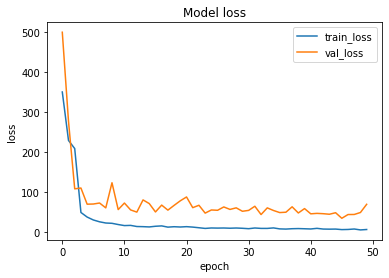

In [35]:
#plotting the training artifacts

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

# TASK 11: IMPORT DATASET FOR FACIAL EXPRESSION DETECTION

In [36]:
#reading the csv files

df = pd.read_csv('C:/Users/visha/Emotion/icml_face_data.csv')

In [37]:
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
3,2,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
4,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...


In [38]:
# Convert the Pixel format into string
def ptostr(x):
    return np.array(x.split(" ")).reshape(48,48,1).astype("float32")

In [39]:
# Resize the image from (48,48) to (96,96)
def resize(x):
    img = x.reshape(48,48)
    return cv2.resize(img,dsize=(96,96), interpolation=cv2.INTER_CUBIC)

In [40]:
# Apply the function using lambda function
df[' pixels'] = df[' pixels'].apply(lambda x: ptostr(x))

In [41]:
# Apply the resize function using lambda function
df[' pixels'] = df[' pixels'].apply(lambda x: resize(x))

In [42]:
df.head()

,emotion,pixels
0,0,"[[69.316925, 73.03865, 79.13719, 84.17186, 85...."
1,0,"[[151.09435, 150.91393, 150.65791, 148.96367, ..."
2,2,"[[23.061905, 25.50914, 29.47847, 33.99843, 36...."
3,2,"[[20.083221, 19.079437, 17.398712, 17.158691, ..."
4,3,"[[76.26172, 76.54747, 77.001785, 77.7672, 78.4..."


In [43]:
label_test = {0:'anger', 1:'disgust', 2:'sad', 3:'happiness', 4: 'surprise'}

Text(0.5, 1.0, 'Number of images per emotion')

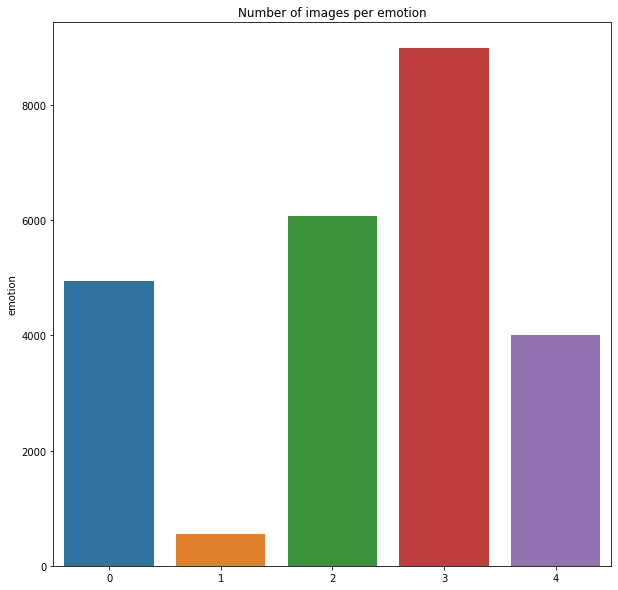

In [44]:
# Check the Datset is balance data or not
plt.figure(figsize=(10,10))
sns.barplot(x = df.emotion.value_counts().index, y = df.emotion.value_counts() )
plt.title('Number of images per emotion')

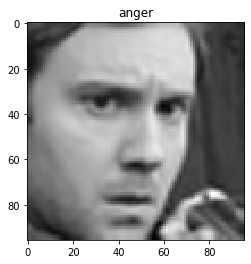

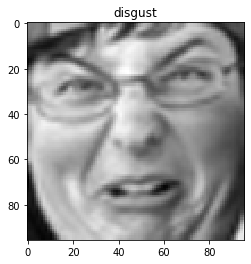

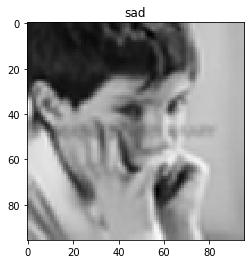

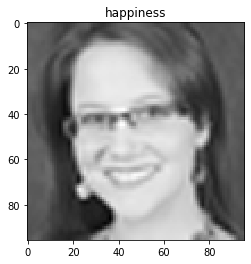

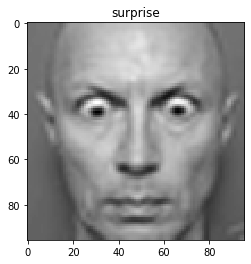

In [49]:
emotions = [0,1,2,3,4]

for i in emotions:
  data = df[df['emotion'] == i][:1]
  img = data[' pixels'].item()
  img = img.reshape(96,96)
  plt.figure()
  plt.title(label_test[i])
  plt.imshow(img, cmap= 'gray')

# Data Augumentation

In [50]:
#spliting the dataframe in to features and labels
from keras.utils import to_categorical

X = df[' pixels']
y = to_categorical(df['emotion'])

X = np.stack(X, axis=0)
X = X.reshape(24568,96,96,1)

print(X.shape, y.shape)

(24568, 96, 96, 1) (24568, 5)


In [51]:
#spliting the dataframe in to train,test and validation data frames

from sklearn.model_selection import train_test_split

X_train ,X_Test, y_train, y_Test= train_test_split(X,y,test_size = 0.1, shuffle = True)
X_val,X_Test, y_val,y_Test = train_test_split(X_Test,y_Test, test_size = 0.5, shuffle = True)


In [52]:
print(X_val.shape, y_val.shape)

(1228, 96, 96, 1) (1228, 5)


In [53]:
#image pre-processing

X_train = X_train/255
X_val   = X_val /255
X_Test  = X_Test/255

In [54]:
train_datagen = ImageDataGenerator(
rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode = "nearest"
)


# Build the Train model

In [55]:

input_shape = (96,96,1)

#Input tensor shape
X_input = Input(input_shape)

#Zero-padding

X = ZeroPadding2D((3,3))(X_input)

# 1 - stage

X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2- stage

X = res_block(X, filter= [64,64,256], stage= 2)

# 3- stage

X = res_block(X, filter= [128,128,512], stage= 3)

# 4- stage

#X = res_block(X, filter= [256,256,1024], stage= 4)



#Average Pooling

X = AveragePooling2D((4,4), name = 'Averagea_Pooling')(X)

#Final layer

X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)


model_e = Model( inputs= X_input, outputs = X, name = 'Resnet18')

model_e.summary()

Model: "Resnet18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 102, 102, 1)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

res_3_identity_2_b (Conv2D)     (None, 5, 5, 128)    147584      activation_35[0][0]              
__________________________________________________________________________________________________
bn_3_identity_2_b (BatchNormali (None, 5, 5, 128)    512         res_3_identity_2_b[0][0]         
__________________________________________________________________________________________________
activation_36 (Activation)      (None, 5, 5, 128)    0           bn_3_identity_2_b[0][0]          
__________________________________________________________________________________________________
res_3_identity_2_c (Conv2D)     (None, 5, 5, 512)    66048       activation_36[0][0]              
__________________________________________________________________________________________________
bn_3_identity_2_c (BatchNormali (None, 5, 5, 512)    2048        res_3_identity_2_c[0][0]         
__________________________________________________________________________________________________
add_11 (Ad

In [65]:
# train the network
model_e.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [66]:
#using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

#save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath="C:/Users/visha/Emotion/weights_emotions.hdf5", verbose=1, save_best_only=True)

In [67]:
history = model_e.fit(train_datagen.flow(X_train, y_train, batch_size=64),validation_data=(X_val, y_val), steps_per_epoch=len(X_train) // 64,epochs= 50, callbacks=[checkpointer, earlystopping])

Epoch 1/50
344/345 [============================>.] - ETA: 1s - loss: 1.2753 - acc: 0.4735
Epoch 00001: val_loss improved from inf to 1.62331, saving model to C:/Users/visha/Emotion/weights_emotions.hdf5
345/345 [==============================] - 652s 2s/step - loss: 1.2743 - acc: 0.4741 - val_loss: 1.6233 - val_acc: 0.3298
Epoch 2/50
344/345 [============================>.] - ETA: 1s - loss: 0.9186 - acc: 0.6359
Epoch 00002: val_loss improved from 1.62331 to 1.34690, saving model to C:/Users/visha/Emotion/weights_emotions.hdf5
345/345 [==============================] - 564s 2s/step - loss: 0.9186 - acc: 0.6361 - val_loss: 1.3469 - val_acc: 0.4593
Epoch 3/50
344/345 [============================>.] - ETA: 1s - loss: 0.8133 - acc: 0.6846
Epoch 00003: val_loss improved from 1.34690 to 1.23903, saving model to C:/Users/visha/Emotion/weights_emotions.hdf5
345/345 [==============================] - 575s 2s/step - loss: 0.8131 - acc: 0.6845 - val_loss: 1.2390 - val_acc: 0.5293
Epoch 4/50
344

In [68]:
#saving the model architecture to json file for future use

model_json = model_e.to_json()
with open("C:/Users/visha/Emotion/emotion.json","w") as json_file:
  json_file.write(model_json)

In [69]:
with open('C:/Users/visha/Emotion/emotion.json', 'r') as json_file:
    json_savedModel= json_file.read()
#load the model architecture 
model_e = tf.keras.models.model_from_json(json_savedModel)
model_e.load_weights('C:/Users/visha/Emotion/weights_emotions.hdf5')
model_e.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

# Performance of the Model

In [70]:
score = model_e.evaluate(X_Test, y_Test)
print('Test Accuracy: {}'.format(score[1]))

1229/1229 [==============================] - 23s 19ms/sample - loss: 0.5827 - acc: 0.7958
Test Accuracy: 0.7957689166069031


In [71]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])